In [277]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

## Reading in Data 

In [278]:
train = pd.read_csv('~/Desktop/Redback/train_test_data/train_Speed.csv')
test = pd.read_csv('~/Desktop/Redback/train_test_data/test_Speed.csv')
remove_cols = ['Unnamed: 0'] 
train = train.drop(remove_cols, axis=1)
test = test.drop(remove_cols, axis=1)

In [279]:
train.head()

,SpeedKMH_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,80.458206,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,...,0.948846,0.322634,1.654680,-1.664843,-1.170158,-1.054219,1.388344,-0.019542,0.373114,-1.278439
1,91.717621,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,...,-1.278742,0.854476,0.118775,0.265861,-1.541565,1.354502,0.884019,1.675101,-0.908377,0.292293
2,92.711037,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,...,0.488404,-0.286708,-1.196300,1.468756,-1.107191,-1.273721,1.703593,1.290507,0.883771,1.840896
3,92.497635,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,...,-1.515706,-0.607310,-1.353579,-0.435863,1.464349,1.375929,-1.157524,0.205979,-0.686924,1.726430
4,89.641335,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,...,0.456738,1.374368,0.426107,1.099293,1.109631,1.476217,0.307232,0.905936,1.401298,-0.505198


In [280]:
test.head()

,SpeedKMH_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,88.989304,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
1,89.014969,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
2,88.968376,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
3,87.289291,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
4,87.459717,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088


In [281]:
y_train = train.iloc[:, train.columns == "SpeedKMH_max"]
X_train = train.iloc[:, train.columns != "SpeedKMH_max"]
y_test = test.iloc[:, test.columns == "SpeedKMH_max"]
X_test = test.iloc[:, test.columns != "SpeedKMH_max"]

## LASSO 

In [282]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train, np.ravel(y_train)) # the np.ravel is a necessary detail for compatibility 
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 0.007683101087853821


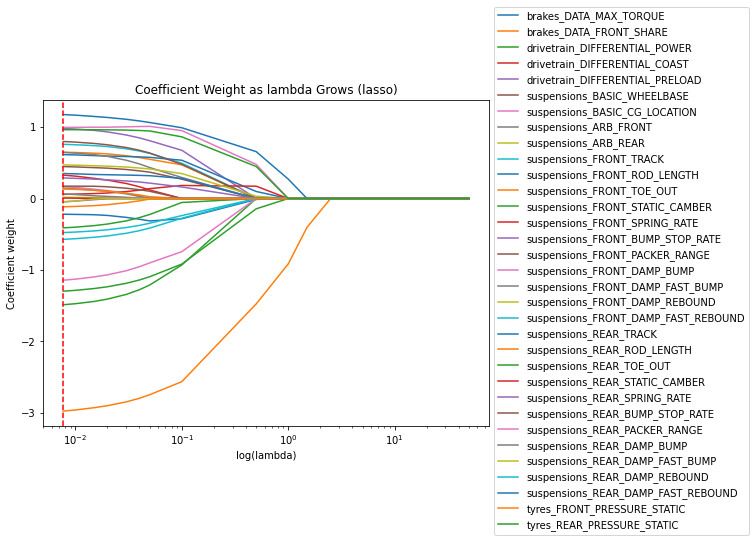

In [283]:
col_list = X_train.columns

y_train_arr = np.array(y_train)
X_train_arr = np.array(X_train)

lambdas = [0.007683101087853821, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 3, 3.66, 5, 10, 20, 30, 50]
lasso_coefs = []
for l in lambdas:
    lasso = Lasso(alpha = l, fit_intercept = True)
    lasso.fit(X_train_arr, y_train_arr)
    lasso_coefs.append(lasso.coef_)

# make sure that the coefs(weights) is an array
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize = (8, 6))
for col in range(lasso_coefs.shape[1]):
    plt.plot(lambdas, lasso_coefs[:,col], label = col_list[col])

# scale x axis to log of lambda 
plt.xscale('log') 

# legend, title, axes labels 
plt.legend(bbox_to_anchor = (1, 1.3))
plt.title('Coefficient Weight as lambda Grows (lasso)')
plt.ylabel('Coefficient weight')
plt.xlabel('log(lambda)')
plt.axvline(0.007683101087853821, color = "red", linestyle = '--')
plt.show()

In [284]:
pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train.columns)

,0
brakes_DATA_MAX_TORQUE,-0.220
brakes_DATA_FRONT_SHARE,0.649
drivetrain_DIFFERENTIAL_POWER,-0.411
drivetrain_DIFFERENTIAL_COAST,0.328
drivetrain_DIFFERENTIAL_PRELOAD,0.981
suspensions_BASIC_WHEELBASE,0.447
suspensions_BASIC_CG_LOCATION,0.167
suspensions_ARB_FRONT,0.144
suspensions_ARB_REAR,0.018
suspensions_FRONT_TRACK,0.759


According to LASSO, all the variables are significant

In [285]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(10, shuffle = True, random_state = 1) 

score_lasso = cross_val_score(lasso_optimal, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')

In [286]:
print("RMSE of LASSO Regression =", np.sqrt(-1*np.mean(score_lasso)))

RMSE of LASSO Regression = 4.880681557205506


In [287]:
X_test

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
1,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
2,-0.947408,-0.186581,-0.987344,-1.492070,0.862829,0.987832,1.808506,1.598770,-0.989155,-1.443904,...,0.450333,-0.436838,-0.842743,-0.243007,0.456334,1.484082,-1.404045,0.728789,1.636737,-0.200990
3,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
4,-0.459390,1.286896,-0.649045,0.364408,0.701657,0.306738,0.594878,-1.763979,0.233039,1.036752,...,1.567738,1.219924,-1.185068,-0.953711,0.627447,1.089141,-0.158915,0.339060,1.223062,0.435088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
393,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
394,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029
395,-0.527661,0.633884,-1.000572,0.826381,-0.259713,1.698538,-0.764420,-0.964367,0.886356,-1.163961,...,-0.470729,-0.751698,-0.995565,-0.677469,0.007018,1.443360,-1.284856,-0.510023,0.502647,0.734029


## Ridge 

In [288]:
#X_train = X_train.iloc[:, X_train.columns != "suspensions_REAR_ROD_LENGTH"]
#X_test = X_test.iloc[:, X_test.columns != "suspensions_REAR_ROD_LENGTH"]

In [289]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [290]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 2.8925088753933013


In [291]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=2.8925088753933013)

In [292]:
kf=KFold(10, shuffle = True, random_state = 1) 
score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("RMSE of Ridge Regression using selected features =", np.sqrt(-1*np.mean(score_ridge)))

RMSE of Ridge Regression using selected features = 4.135355068770852


In [293]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)

y_pred = np.rint(y_pred)
y_test = np.rint(y_test)
print(r2_score(y_test, y_pred))

0.4408398532176291


In [294]:
y_test.iloc[23,:]

SpeedKMH_max    92.0
Name: 23, dtype: float64

In [295]:
y_pred[23]

93.0

## Max Speed Predictions

### Seeing what the max speed would be for optimal parameters

In [306]:
best_input = pd.read_csv("/Users/lexy/Desktop/Redback/best_average_input_params.csv")

In [307]:
best_input = best_input.T

In [308]:
header_row = 0

best_input.columns = best_input.iloc[header_row]

In [309]:
dictionaryObject = best_input.to_dict()

print("DataFrame as a dictionary:")
print(dictionaryObject)


DataFrame as a dictionary:
{'brakes_DATA_MAX_TORQUE': {'Unnamed: 0': 'brakes_DATA_MAX_TORQUE', '0': 607.4543293535748}, 'brakes_DATA_FRONT_SHARE': {'Unnamed: 0': 'brakes_DATA_FRONT_SHARE', '0': 0.6780105288932419}, 'drivetrain_DIFFERENTIAL_POWER': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_POWER', '0': 0.4074694417238002}, 'drivetrain_DIFFERENTIAL_COAST': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_COAST', '0': 0.4660628011753183}, 'drivetrain_DIFFERENTIAL_PRELOAD': {'Unnamed: 0': 'drivetrain_DIFFERENTIAL_PRELOAD', '0': 12.069866973555335}, 'suspensions_BASIC_WHEELBASE': {'Unnamed: 0': 'suspensions_BASIC_WHEELBASE', '0': 1.6885505093046032}, 'suspensions_BASIC_CG_LOCATION': {'Unnamed: 0': 'suspensions_BASIC_CG_LOCATION', '0': 0.4723054358472086}, 'suspensions_ARB_FRONT': {'Unnamed: 0': 'suspensions_ARB_FRONT', '0': 81733.74574372184}, 'suspensions_ARB_REAR': {'Unnamed: 0': 'suspensions_ARB_REAR', '0': 81671.1029793046}, 'suspensions_FRONT_TRACK': {'Unnamed: 0': 'suspensions_FRONT_TRACK', '0':

In [310]:
best_input = best_input.iloc[1,:]

In [311]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

response = ['SpeedKMH_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature


best_input = (best_input - mu)/sigma

In [312]:
y_hat = ridge.predict(pd.DataFrame([best_input]))

In [313]:
y_hat[0]

88.48194614826454

This is the predicted Max speed of our optimal input parameters!! which makes sense!!! :))) 


### Seeing what Max Speed would be for case 2 (80_85)

In [314]:
case2_input = pd.read_csv("/Users/lexy/Desktop/Redback/case2_average_input_params.csv")
case2_input = case2_input.T
header_row = 0
case2_input.columns = case2_input.iloc[header_row]

dictionaryObject = case2_input.to_dict()

case2_input = case2_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

response = ['SpeedKMH_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature


case2_input = (case2_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case2_input]))

print("Predicted Max Speed is :",y_hat[0])

Predicted Max Speed is : 84.25092863091648


### Seeing what Max Speed would be for case 3 (75_80)

In [315]:
case3_input = pd.read_csv("/Users/lexy/Desktop/Redback/case3_average_input_params.csv")
case3_input = case3_input.T
header_row = 0
case3_input.columns = case3_input.iloc[header_row]

dictionaryObject = case3_input.to_dict()

case3_input = case3_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

response = ['SpeedKMH_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature


case3_input = (case3_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case3_input]))

print("Predicted Max Speed is :",y_hat[0])

Predicted Max Speed is : 84.69631920228484


### Seeing what Max Speed would be for case 4 (70_75)

In [316]:
case4_input = pd.read_csv("/Users/lexy/Desktop/Redback/case4_average_input_params.csv")
case4_input = case4_input.T
header_row = 0
case4_input.columns = case4_input.iloc[header_row]

dictionaryObject = case4_input.to_dict()

case4_input = case4_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

response = ['SpeedKMH_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature


case4_input = (case4_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([case4_input]))

print("Predicted Max Speed is :",y_hat[0])

Predicted Max Speed is : 79.54488397446018


### Seeing what Max Speed would be for worst case 

In [318]:
worst_input = pd.read_csv("/Users/lexy/Desktop/Redback/worst_average_input_params.csv")
worst_input = worst_input.T
header_row = 0
worst_input.columns = worst_input.iloc[header_row]

dictionaryObject = worst_input.to_dict()

worst_input = worst_input.iloc[1,:]

df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

input_params = df_recent.iloc[:, -33:]

response = ['SpeedKMH_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature


worst_input = (worst_input - mu)/sigma

y_hat = ridge.predict(pd.DataFrame([worst_input]))

print("Predicted Max Speed is :",y_hat[0])

Predicted Max Speed is : 79.80840468425045


## Model Performance comparison 

In [261]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross validator
kf=KFold(10, shuffle = True, random_state = 1) 

# Methods
columns = ['CV RMSE']
rows = ['Ridge','Lasso']

regressions = [ridge, lasso_optimal]
results = pd.DataFrame(0.0, columns = columns, index = rows) # initialising a dataframe to hold the results

methods = {k: v for k, v in zip(rows, regressions)}

keys = ['Ridge','Lasso']
for key in keys:
    scores = cross_val_score(methods[key], X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
    print('scores for', key, ' : ', scores) 
    results.loc[key] = np.sqrt(-1*np.mean(scores)) 
    
results.round(3)

scores for Ridge  :  [-13.04289155 -17.65223134 -17.18543474 -20.13656425 -16.67786705
 -19.03058669 -18.39623542 -21.90789296 -12.07810671 -13.1374286 ]
scores for Lasso  :  [-17.36924763 -22.20054525 -24.62600696 -24.19445953 -22.57592912
 -29.088239   -27.51420176 -25.15576193 -18.55979826 -24.99746341]


,CV RMSE
Ridge,4.114
Lasso,4.861


Using LASSO to select best features and then running ridge on selected features resulted in lower RMSE. 

I think if we had some interaction terms we would be able to improve model performance. Let's try by adding some in

## Feature Engineering 

### Data Processing again

In [262]:
df_recent = pd.read_csv('~/Desktop/Redback/Ultimate_df_recent.csv')
remove_cols = ['Unnamed: 0'] 
df_recent = df_recent.drop(remove_cols, axis=1)

input_params = df_recent.iloc[:, -33:]

train = df_recent.sample(frac = 0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

y_train = train.iloc[:, train.columns == "SpeedKMH_max"]
X_train = train.iloc[:, -33:]
y_test = test.iloc[:, test.columns == "SpeedKMH_max"]
X_test = test.iloc[:, -33:]

In [263]:
# polynomial features degree 2
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

X_train_poly = poly.fit_transform(X_train)
poly_col_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, columns = poly_col_names) 
inplace = True
X_train_poly.columns = X_train_poly.columns.str.replace(',','_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

# test set
X_test_poly = poly.fit_transform(X_test)
poly_col_names = poly.get_feature_names(input_features = X_test.columns)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = poly_col_names) 

X_test_poly.columns = X_test_poly.columns.str.replace(',','_')
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')

<ipython-input-263-7e5405319c0f>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')
<ipython-input-263-7e5405319c0f>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_test_poly.columns = X_test_poly.columns.str.replace('^', '_')


In [264]:
# scaling
mu = X_train_poly.mean() # mean for each feature
sigma = X_train_poly.std() # std for each feature

X_train_poly_scaled = (X_train_poly - mu)/sigma
X_test_poly_scaled = (X_test_poly - mu)/sigma

### Lasso (with poly)

In [265]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train_poly_scaled, np.ravel(y_train)) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8608448589102409, tolerance: 1.7580865850775425
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1081575397142274, tolerance: 1.7580865850775425
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8725764819193103, tolerance: 1.7580865850775425
  model = cd_fast.enet_coordina

LassoCV(cv=5)

In [266]:
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 0.002131629222715271


In [267]:
lasso_features = pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train_poly_scaled.columns)

In [268]:
X_train_poly_scaled

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_DAMP_REBOUND_2,suspensions_REAR_DAMP_REBOUND suspensions_REAR_DAMP_FAST_REBOUND,suspensions_REAR_DAMP_REBOUND tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_REBOUND tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND_2,suspensions_REAR_DAMP_FAST_REBOUND tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_DAMP_FAST_REBOUND tyres_REAR_PRESSURE_STATIC,tyres_FRONT_PRESSURE_STATIC_2,tyres_FRONT_PRESSURE_STATIC tyres_REAR_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC_2
0,1.513706,-0.496028,0.749747,-0.574274,0.945005,0.443342,-0.995821,-1.910269,-1.457874,-0.985739,...,1.511663,0.881750,1.542963,-0.174109,-0.219714,0.198825,-0.696292,0.241276,-0.680571,-1.230444
1,0.440057,1.564940,-0.589535,0.314667,-0.189615,1.628311,0.317802,0.931124,1.298159,-0.560395,...,0.842522,2.352985,-0.148224,0.971928,2.044275,0.437350,1.545123,-0.917350,-0.519448,0.174259
2,1.250806,0.863518,-0.374172,1.551179,-0.634678,-1.173899,-1.213966,-0.403501,0.423389,-0.418503,...,1.968281,2.724705,2.413174,3.320843,1.429509,1.846266,2.457145,0.836181,2.369946,2.232395
3,-1.830338,0.096889,-0.169427,-1.246456,1.638991,-0.223908,1.382735,-0.645199,0.370391,0.682063,...,-1.094842,-0.575719,-1.203221,-0.095473,0.015184,-0.289537,1.129655,-0.751298,0.476013,2.057389
4,-1.616643,1.317361,1.204248,1.282240,1.104064,-1.093954,-0.402191,0.170541,0.035663,-0.634390,...,0.169783,1.051956,1.471854,-0.132577,0.874053,1.877174,0.328641,1.516541,0.618773,-0.624875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.253020,-0.787218,0.917728,0.787556,-1.069729,1.388933,1.446852,-1.307422,-0.208520,-1.126964,...,0.001496,1.546867,-0.725189,0.890698,1.971337,0.218583,2.146292,-1.050882,-0.331576,1.066696
923,1.592009,-0.186163,-1.186386,0.152926,0.913135,-1.241835,-0.814562,-1.027952,1.394277,1.307760,...,0.527767,1.167199,-0.296802,0.855432,0.664421,-0.112236,0.852436,-0.917616,-0.456080,0.313237
924,0.102421,0.694292,-0.802115,-0.297512,-0.140659,0.586363,-0.215168,-0.543295,1.241881,1.194680,...,-1.176008,-0.670726,-1.554349,-0.228215,-0.000402,-0.668758,1.134600,-1.149762,-0.157337,2.114576
925,1.094944,-1.777535,-0.953535,0.946532,1.265623,0.679602,-0.800586,0.443622,-0.393545,0.742778,...,0.486266,-1.237876,1.609410,-0.711500,-1.320899,-1.129208,-1.566462,1.255186,-0.401320,-1.330010


In [269]:
X_train_poly_selected_features = X_train_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]
X_test_poly_selected_features = X_test_poly_scaled.iloc[:,lasso_optimal.coef_ != 0]

In [270]:
X_train_poly_selected_features

,suspensions_FRONT_TRACK,suspensions_FRONT_TOE_OUT,brakes_DATA_MAX_TORQUE suspensions_BASIC_CG_LOCATION,brakes_DATA_MAX_TORQUE suspensions_FRONT_ROD_LENGTH,brakes_DATA_MAX_TORQUE suspensions_REAR_TRACK,brakes_DATA_MAX_TORQUE suspensions_REAR_DAMP_FAST_REBOUND,brakes_DATA_FRONT_SHARE suspensions_FRONT_TRACK,brakes_DATA_FRONT_SHARE suspensions_FRONT_TOE_OUT,drivetrain_DIFFERENTIAL_POWER suspensions_ARB_REAR,drivetrain_DIFFERENTIAL_POWER suspensions_FRONT_ROD_LENGTH,...,suspensions_REAR_STATIC_CAMBER suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_STATIC_CAMBER suspensions_REAR_DAMP_REBOUND,suspensions_REAR_SPRING_RATE tyres_REAR_PRESSURE_STATIC,suspensions_REAR_BUMP_STOP_RATE tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_PACKER_RANGE suspensions_REAR_DAMP_REBOUND,suspensions_REAR_PACKER_RANGE tyres_FRONT_PRESSURE_STATIC,suspensions_REAR_PACKER_RANGE tyres_REAR_PRESSURE_STATIC,suspensions_REAR_DAMP_BUMP_2,suspensions_REAR_DAMP_FAST_BUMP_2,suspensions_REAR_DAMP_REBOUND tyres_REAR_PRESSURE_STATIC
0,-0.985739,-0.169527,0.507909,1.333962,1.474768,0.535069,-1.003522,-0.238938,-0.731407,1.354354,...,0.898226,0.841984,-0.717544,1.770140,-0.573771,-1.050191,-1.613505,-1.129662,-1.019846,-0.174109
1,-0.560395,-0.082670,0.703660,1.568123,0.486021,1.650893,0.986793,0.053648,0.025226,0.076253,...,-2.334039,-1.895275,0.868113,-0.525317,0.787025,-0.525294,0.399746,-1.323887,1.543468,0.971928
2,-0.418503,-0.704035,0.100569,1.373820,0.404549,1.777585,0.493688,-0.692196,-0.077461,0.124879,...,0.756880,0.150665,0.939999,-0.567419,2.526935,2.165862,2.771850,-1.091681,-1.116233,3.320843
3,0.682063,-1.098234,-0.986720,-1.377890,-1.569028,-0.618318,0.535562,-1.092391,0.091672,-0.834056,...,-2.687796,-0.640573,0.526830,-1.308363,-0.979125,-0.758788,0.715056,1.710861,1.578654,-0.095473
4,-0.634390,0.044276,-1.672815,0.118769,-1.936090,-0.120178,0.722421,0.173186,1.011312,2.174539,...,0.061705,0.354894,0.517819,1.489792,0.944094,2.353949,0.327285,1.179024,1.746245,-0.132577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,-1.126964,-0.336561,-0.304182,0.192760,-1.654794,0.534977,-1.317360,-0.408956,0.539326,1.662628,...,0.749756,0.803568,1.683633,0.039320,0.670220,-0.369677,1.490694,-1.245101,0.133781,0.890698
923,1.307760,1.173422,0.743397,1.726496,1.993565,1.393155,0.647025,1.050932,-0.762208,-0.842170,...,0.214472,-1.854471,-0.375114,-0.608307,1.308394,-0.001296,1.222541,-0.342516,-1.145838,0.855432
924,1.194680,1.420632,-0.026375,0.348192,0.279341,0.174988,1.459708,1.555844,-0.273581,-0.538774,...,0.403339,-0.247220,2.756232,-0.605178,-1.169435,-1.298419,0.434600,-0.560537,-1.175691,-0.228215
925,0.742778,1.313731,0.348389,-1.630431,0.955837,-1.284931,-1.227654,0.713015,-0.799506,-1.130983,...,0.836177,0.911204,-0.912670,1.371700,0.438102,1.106390,-0.919609,0.197357,1.242308,-0.711500


Therefore, LASSO has reduced our feature subset from 594 to 149. Now we do ridge on these selected features

### Ridge (with poly selected)

In [271]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train_poly_selected_features, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [272]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 0.47640689621104587


In [273]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=0.47640689621104587)

In [274]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(10, shuffle=True, random_state=1) 

score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 4.7859773927112625


In [275]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)


y_pred = np.rint(y_pred)
y_test = np.rint(y_test)

print(r2_score(y_test, y_pred)*100)

21.550007797646852


It looks like it's actually performing worse than our initial ridge but better than our initial lasso. I'm thinking of trying to predict max speed instead now instead of max laptime. Maybe the input parameters are more related to the max speed than it is to the lap time. I know for sure that max speed determines lap time so if we can predict max speed then we can also predict lap time roughly using the prediction of max speed. 

In [49]:
y_test

,SpeedKMH_max
15,89.0
20,89.0
21,89.0
24,87.0
25,87.0
...,...
1312,86.0
1319,86.0
1320,86.0
1322,87.0


In [276]:
y_pred

array([90., 90., 90., 93., 93., 93., 88., 88., 89., 89., 84., 84., 88.,
       88., 88., 90., 87., 87., 87., 87., 87., 92., 92., 92., 89., 89.,
       89., 89., 89., 89., 89., 89., 89., 89., 89., 85., 85., 85., 85.,
       82., 82., 88., 88., 88., 88., 88., 86., 86., 85., 85., 85., 85.,
       89., 89., 89., 89., 93., 93., 93., 93., 90., 90., 90., 90., 90.,
       83., 83., 83., 90., 90., 90., 91., 91., 91., 91., 88., 88., 89.,
       85., 85., 85., 85., 85., 85., 85., 85., 88., 88., 90., 88., 89.,
       89., 89., 92., 92., 92., 92., 92., 87., 87., 85., 85., 85., 85.,
       86., 86., 86., 86., 88., 88., 88., 84., 84., 86., 86., 86., 86.,
       84., 84., 84., 84., 84., 84., 88., 88., 88., 88., 91., 91., 91.,
       89., 89., 89., 87., 87., 87., 87., 88., 88., 88., 83., 83., 83.,
       83., 83., 83., 84., 84., 84., 86., 86., 86., 86., 86., 86., 89.,
       89., 89., 89., 89., 89., 89., 89., 89., 89., 86., 86., 86., 86.,
       86., 86., 86., 86., 86., 90., 90., 90., 90., 90., 90., 90